In [1]:
"""
LICENSE
This notebook (code) is licensed under GPL v. 3 license. 
The text of the license is available at 
https://www.gnu.org/licenses/gpl-3.0.en.html

CONTACTS
Author: Oleg V. Zolotov
e-mail: ZolotovO@gmail.com
copyright: Oleg V. Zolotov

NOTES
To re-evaluate the results one will need to
- have python3 with scipy, numpy, and matplotlib installed;
- download the dataset (file ez.npz);
- modify in this notebook the path to the actual dataset's location. 
"""

"\nLICENSE\nThis notebook (code) is licensed under GPL v. 3 license. \nThe text of the license is available at \nhttps://www.gnu.org/licenses/gpl-3.0.en.html\n\nCONTACTS\nAuthor: Oleg V. Zolotov\ne-mail: ZolotovO@gmail.com\ncopyright: Oleg V. Zolotov\n\nNOTES\nTo re-evaluate the results one will need to\n- have python3 with scipy, numpy, and matplotlib installed;\n- download the dataset (file ez.npz);\n- modify in this notebook the path to the actual dataset's location. \n"

In [2]:
import scipy.io as s
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

@np.vectorize
def conductivity(z):
    """
    This function defines the electric conductivity profile  
    according to Eq.8 of [Kuo and Lee,2017, doi:10.1002/2016JA023579]
    """
    sigma_0 =  2.0E-14  # [S/m]
    h_z = 6.            # [km]
    return sigma_0*np.exp(z/h_z)

In [3]:
# Load the dataset
# !!! Check the path is valid !!!
path_to_file = r"ez.npz"

import os.path
assert(os.path.isfile(path_to_file))

dataset  = np.load(path_to_file)

x, y, altitudes, ez = dataset['x'], dataset['y'], dataset['altitudes'], dataset['ez']

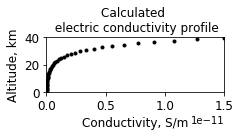

In [4]:
# calculate conductivity profile for the given altitudinal nodes
conductivity_profile = conductivity(altitudes)

# plot the conductivity profile
fig, ax = plt.subplots(figsize=(3.5,2))
ax.set_xlim([0, 1.5E-11])
ax.set_xlabel('Conductivity, S/m', fontsize = 12)
ax.set_ylabel('Altitude, km', fontsize = 12)
ax.set_ylim([0, 40])
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

ax.plot(conductivity_profile, altitudes, 'o', markersize = 3, color = 'black')
plt.title("Calculated \n electric conductivity profile", fontsize = 12)
plt.tight_layout()
plt.show()
plt.close()

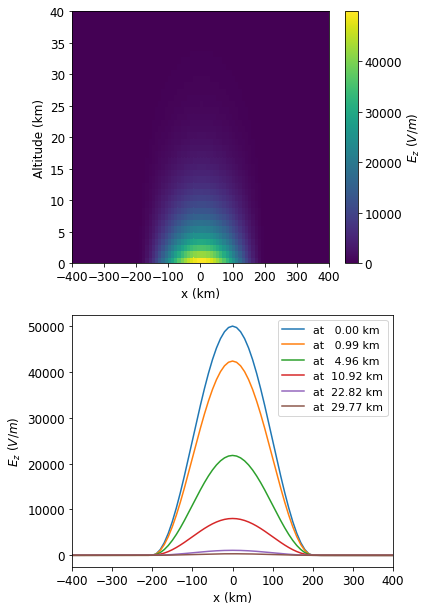

In [5]:
#plot Ez map in XZ plane and a few x-variations
fig = plt.figure(figsize=(6,8.6))
gs = gridspec.GridSpec(   2
                        , 1
                        , height_ratios=[1, 1]
                        )

ax0 = plt.subplot(gs[0])
plt.xticks(fontsize = 12); plt.yticks(fontsize = 12)
ax0.set_xlim([-400,400]); ax0.set_ylim([0,40])

# make the grid for the map
Z, X = np.meshgrid(altitudes[np.newaxis, :],x[ :, np.newaxis])

# and plot the map
plt.pcolor(X,Z, ez[:,100,:])

plt.ylabel("Altitude (km)", fontsize = 12)
plt.xlabel("x (km)", fontsize = 12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize = 12)
cb.set_label(label = '$E_z$ $(V/m)$', size = 12)

#plot Ez variation along the x-axis
ax1 = plt.subplot(gs[1])
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
ax1.set_xlim([-400,400])
ez_label = 'at {:6.2f} km'
for alt in [0,1,5,11,23,30]:
    plt.plot(x, ez[:,100,alt], label = ez_label.format(altitudes[alt]))
plt.ylabel("$E_z$ ($V/m$)", fontsize = 12)
plt.xlabel("x (km)", fontsize = 12)
plt.legend(fontsize = 11)

plt.subplots_adjust(wspace=0.25, hspace=0.35)
plt.tight_layout()

plt.show()